# **Seeking Truth in Sound and Words: Determining Story Authenticity through Audio and Text Feature Fusion**

# 1 Author

**Student Name**:  ZhiWei Wang

**Student ID**:  



# 2 Problem formulation

The problem at hand is to determine whether a narrated story is true or deceptive based on an audio recording of **3-5 minutes** in duration. This task is inherently a **binary classification problem**, where the objective is to classify the story into one of two categories:

- **True Story**
- **Deceptive Story**

### Why is this problem interesting?

1. **Multi-modal Learning**:  
   This problem involves both **audio features** and **textual features**, making it a fascinating example of multi-modal data processing. The audio data provides rich acoustic information such as tone, pitch, and rhythm, while the transcribed text contains semantic and syntactic details. Combining these modalities challenges us to effectively fuse diverse types of information.

2. **Real-world Applications**:  
   Solving this problem has numerous practical implications, such as:
   - Enhancing systems for detecting fake news or deceptive narratives in podcasts or news reports.
   - Assisting in psychological studies where vocal and textual cues help identify truthfulness or deception.
   - Improving assistive technologies for journalists or law enforcement by analyzing the authenticity of recorded interviews.

3. **Complexity of Human Behavior**:  
   Human deception is a nuanced behavior that involves subtle cues in speech, tone, and language. Capturing and interpreting these cues computationally is a challenging yet rewarding task in the field of machine learning.

# 3 Methodology
This section describes the training task, validation task, performance evaluation criteria, and additional steps implemented to effectively build the stacking model.

## 3.1 Training Task

#### Objective
The goal of the training task is to build a **multimodal stacking model** that combines audio and text features to predict the authenticity of a narrated story. This involves training three base models to extract modality-specific features and a meta-model to combine their outputs for final predictions.

#### 1. **Dataset Split**
- **Dataset Composition**: The dataset consists of 100 samples, each containing an audio file and corresponding labels (language and story type).
- **Train-Test Split**:
  - The dataset was split into **training** (80 samples) and **testing** (20 samples) sets using **stratified sampling** to maintain consistent language and story type distributions in both subsets.
  - The training set was used to train the base models and the meta-model, while the testing set was reserved for evaluation.

#### 2. **Data Preprocessing**
- **Audio Feature Extraction**:
  - Audio features were extracted using the pre-trained `wav2vec2` model.
  - Features were padded or truncated to a fixed length of 16,384 to ensure uniformity.
- **Text Feature Extraction**:
  - Audio files were transcribed into text using the `wav2vec2` model.
  - Semantic text features were extracted using the multilingual BERT model, resulting in a fixed feature dimension of 768 for all text samples.
- **Final Input Dimensions**:
  - Audio features: `[batch_size, 16,384]`
  - Text features: `[batch_size, 768]`

#### 3. **Base Model Training**
Three base models were trained independently using the preprocessed features:

1. **AudioTextClassifier**:
   - Combines audio and text features by concatenating them and passing through fully connected layers.
   - Outputs a single probability score for binary classification.

2. **SharedSpaceClassifier**:
   - Projects audio and text features into a shared latent space for feature alignment.
   - Combines the aligned features for final classification.

3. **AttentionFusionClassifier**:
   - Uses an attention mechanism to dynamically weight audio and text features based on their importance for classification.
   - Outputs the final classification result.

**Training Parameters**:
- **Loss Function**: Binary Cross-Entropy Loss.
- **Optimizer**: Adam optimizer with a learning rate of 0.001.
- **Training Epochs**: 20 epochs.
- **Batch Size**: 4 samples per batch.

**Training Process**:
Each model was trained using the same DataLoader and monitored for average loss per epoch. The training process involved forward propagation, loss calculation, backward propagation, and weight updates using the optimizer.

**Loss Visualization**:
The loss curves for the three base models across 20 epochs were plotted to observe the convergence trends.

#### 4. **Meta-Model Training**
- The outputs of the three base models (classification probabilities) were concatenated into a single input vector `[batch_size, 3]` for the meta-model.
- **Meta-Model Architecture**:
  - A two-layer fully connected network (`StackingMetaModel`) with a ReLU activation function and a sigmoid output layer.
  - Takes the concatenated base model outputs as input and predicts the final classification probability.
- **Training**:
  - Loss: Binary Cross-Entropy Loss.
  - Optimizer: Adam optimizer with a learning rate of 0.001.
  - Duration: 20 epochs.

## 3.2 Validation Task

The validation task aims to evaluate the generalization ability of the stacking model. The validation process includes the following steps:

1. **Test Set Processing**:
   - Features were extracted from the test set using the same methods as for the training set, ensuring that audio and text feature dimensions remained consistent (audio: 16,384; text: 768).

2. **Validation Steps**:
   - Test set audio and text features are fed into the base models to generate classification probabilities.
   - The outputs from the base models are concatenated as inputs to the stacking meta-model, which produces the final predictions.
   - The test loss and classification metrics are computed to evaluate the performance of the stacking model.

## 3.3 Performance Evaluation

The following criteria were used to evaluate the stacking model's performance:

1. **Accuracy**:
   - The proportion of correctly classified samples among the total samples, reflecting overall classification performance.

   $$
   \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Samples}}
   $$

2. **Precision, Recall, F1-Score**:
   - **Precision**: The proportion of true positives among all predicted positives for a class.
   - **Recall**: The proportion of true positives identified out of all actual positives for a class.
   - **F1-Score**: The harmonic mean of precision and recall, providing a balanced performance measure.

   $$
   \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

3. **Confusion Matrix**:
   - A matrix showing the model's prediction results for each class, including true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

4. **Loss**:
   - The average loss on the test set, reflecting the discrepancy between predicted probabilities and true labels. A lower loss indicates better performance.

## 3.4 Additional Steps

To enhance the stacking model's performance, the following additional steps were implemented:

1. **Stratified Sampling**:
   - Ensured consistent distribution of language and story types across training and test sets, improving the reliability of model evaluation.

2. **Multimodal Feature Processing**:
   - **Audio**: Features were extracted using `wav2vec2` and padded or truncated to a consistent length, ensuring uniform input dimensions.
   - **Text**: Semantic features were extracted using the multilingual BERT model, enhancing the model's adaptability to different languages.

3. **Stacking Model Integration**:
   - The outputs of three base models were used as inputs to the stacking meta-model, leveraging multimodal features and different model predictions to improve performance.

4. **Performance Visualization**:
   - A training loss curve was plotted to visualize the training process.
   - Confusion matrices and classification reports were generated to identify model strengths and weaknesses.

# 4 Implemented ML prediction pipelines

This section describes the machine learning prediction pipeline implemented using the stacking method. It clearly defines the inputs, outputs, intermediate data structures, and transitions between stages. The pipeline consists of three main stages: **Transformation Stage**, **Model Stage**, and **Ensemble Stage**.

### **Pipeline Overview**

1. **Input**:
   - Raw audio files (3-5 minutes, sampled at 16kHz).
   - Labels: language (English/Chinese) and story type (True/Deceptive).

2. **Stages**:
   - **Transformation Stage**:
     - Extract multimodal features from audio and text.
     - Fixed feature dimensions: audio (16,384) and text (768).
   - **Model Stage**:
     - Three base models (`AttentionFusionClassifier`, `SharedSpaceClassifier`, and `AudioTextClassifier`) independently process features and produce prediction probabilities.
   - **Ensemble Stage**:
     - Stack the prediction probabilities from the three base models as input to a meta-model (`StackingMetaModel`) for final classification.

3. **Output**:
   - Binary classification result: 1 for True Story, 0 for Deceptive Story.

## 4.1 Transformation stage

### Input and Output
- **Input**:
  - Raw audio files.
  - Audio labels, including language (English/Chinese) and story type (True/Deceptive).
- **Output**:
  - Audio features: fixed-length vector of size 16,384.
  - Text features: multilingual BERT embeddings of size 768.

### Steps
1. **Audio Feature Extraction**:
   - Extract features using the pre-trained `wav2vec2` model.
   - Pad or truncate audio features to a fixed length of 16,384 for uniform input dimensions.
2. **Text Feature Extraction**:
   - Transcribe audio using the `wav2vec2` model.
   - Extract semantic text features using the multilingual BERT model.
3. **Data Normalization**:
   - Standardize audio and text features to improve numerical stability during training.

### Rationale
- Audio and text carry complementary information—speech patterns and linguistic semantics, respectively—making their combination effective for predicting the authenticity of a story.
- The choice of `wav2vec2` and multilingual BERT ensures high-quality feature extraction, leveraging state-of-the-art models in audio and text tasks.

## 4.2 Model stage

### rchitecture
In this stage, three base models independently process multimodal features and produce prediction probabilities as intermediate outputs.

1. **Base Model 1: `AudioTextClassifier`**:
   - Uses fully connected layers to process audio and text features independently, reducing audio features to 1,024 dimensions and text features to 512 dimensions.
   - Concatenates audio and text features, which are further processed through fully connected layers for classification.

2. **Base Model 2: `SharedSpaceClassifier`**:
   - Projects audio and text features into a shared latent space (dimension 512) to fuse them effectively.
   - Classification is performed based on the shared representation.

3. **Base Model 3: `AttentionFusionClassifier`**:
   - Uses an attention mechanism to dynamically adjust the importance of audio and text features.
   - Combines the weighted features and processes them through fully connected layers for classification.

### Rationale
- Each model employs a distinct fusion strategy (concatenation, shared latent space, and attention), capturing complementary aspects of multimodal data to enhance classification performance.

#### Intermediate Output
- Each base model outputs a classification probability of size `[batch_size, 1]`.

## 4.3 Ensemble stage

### Steps
1. **Stacked Input**:
   - Combine the prediction probabilities from the three base models into a single vector of size `[batch_size, 3]`.
2. **Meta-Model Training**:
   - Train a lightweight neural network (`StackingMetaModel`) on the stacked probabilities to produce the final classification.
   - **Meta-Model Architecture**:
     - Input Layer: Size 3 (from the three base models).
     - Two hidden layers with 16 and 1 neurons, activated by ReLU and Sigmoid, respectively.
3. **Final Output**:
   - The meta-model outputs a classification probability, which is thresholded at 0.5 to produce the final binary classification result.

### Rationale
- The stacking method effectively combines predictions from the three base models, leveraging the complementary strengths of different fusion strategies.
- The meta-model learns relationships among the outputs of base models, improving classification accuracy.

### 4.4 Summary
Below is an overview of the pipeline:

| **Stage**         | **Input**                | **Intermediate Output**       | **Final Output**            |
|--------------------|--------------------------|--------------------------------|-----------------------------|
| Transformation     | Raw audio files and labels | Audio features (16,384) + Text features (768) | Standardized representations |
| Model              | Audio + Text features     | Prediction probabilities (3 models) | Stacked probabilities `[batch_size, 3]` |
| Ensemble           | Prediction probabilities  | Final classification probability | Binary classification result (0 or 1) |

This pipeline design leverages the strengths of multimodal data and stacking methods, enabling the base models to collaborate effectively and enhancing the final classification performance.

# 5 Dataset

This section describes the dataset created based on the **MLEnd Deception Dataset** for training and evaluating the multimodal stacked model. The dataset includes audio and text features processed to ensure consistency and usability.

### **Summary**

Through feature extraction, stratified sampling, and data visualization, we constructed reliable training and testing datasets, ensuring they follow independent and identically distributed (IID) principles. Despite the dataset's small size, the preprocessing and label corrections provide a solid foundation for training multimodal models. If further enhancements to the dataset or feature processing are required, please let me know!

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from transformers import Wav2Vec2ForCTC, Wav2Vec2FeatureExtractor, Wav2Vec2Processor, BertModel, BertTokenizer, logging
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import Dataset, TensorDataset, DataLoader  # Ensure DataLoader is imported
import librosa
import matplotlib.pyplot as plt
import warnings

# Suppress UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)
# Set logging level for Transformers library to only show errors
logging.set_verbosity_error()

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


## 5.1 Dataset Source
- **MLEnd Deception Dataset**:
  - Contains 100 audio samples, each consisting of a `.wav` file and corresponding labels.
  - Labels include:
    - **Language**: Indicates the language of the audio (English or Chinese).
    - **Story Type**: Indicates whether the story is true (True Story) or deceptive (Deceptive Story).
- The dataset is stored in the `CBU0521DD_stories` directory, and label information is provided in the `CBU0521DD_stories_attributes.csv` file.

In [2]:
# Load the CSV file containing metadata about the audio files
attributes_file = "CBU0521DD_stories_attributes.csv"  # Path to the CSV file
df = pd.read_csv(attributes_file)  # Read the CSV file into a pandas DataFrame

# Print a success message and display the first few rows of the DataFrame
print("Dataframe loaded successfully.")
print(df.head())  # Display the first 5 rows of the DataFrame for inspection

Dataframe loaded successfully.
    filename Language  Story_type
0  00001.wav  Chinese  True Story
1  00002.wav  Chinese  True Story
2  00003.wav  Chinese  True Story
3  00004.wav  Chinese  True Story
4  00005.wav  Chinese  True Story


## 5.2 Label Correction
In the original dataset, the `language` label for file `00094.wav` was incorrect. This label has been corrected to ensure the consistency and reliability of the dataset and the evaluation process.

## 5.3 Data Preprocessing

**1. Audio Feature Extraction**
- Audio features were extracted using the **pretrained `wav2vec2` model**:
  - The `wav2vec2-xls-r-300m` model was used for feature extraction.
  - Audio features were padded or truncated to a fixed length of 16,384.
- Feature processing steps:
  - **Padding**: If the audio feature length was less than 16,384, zero padding was applied.
  - **Truncation**: If the audio feature length exceeded 16,384, mean pooling was applied to truncate it.
- Result: A fixed-dimensional feature representation was generated for each audio sample.

**2. Text Feature Extraction**
- Audio was transcribed into text using **`wav2vec2` models**:
  - The `wav2vec2-base-960h` model was used for English transcription.
  - The `wav2vec2-large-xlsr-53-chinese-zh-cn` model was used for Chinese transcription.
- Semantic features were extracted from the transcribed text using the multilingual **`BERT` model**:
  - Transcriptions were processed into fixed-size embeddings with a dimension of 768.

**3. Label Processing**
- Labels were processed as binary classification targets:
  - **1**: Indicates a true story.
  - **0**: Indicates a deceptive story.

In [3]:
# Load pre-trained models and processors (once at the start)
model_english = Wav2Vec2ForCTC.from_pretrained("./wav2vec2-base-960h").to(device)  # English Wav2Vec2 model
processor_english = Wav2Vec2Processor.from_pretrained("./wav2vec2-base-960h")  # English processor

model_chinese = Wav2Vec2ForCTC.from_pretrained("./wav2vec2-large-xlsr-53-chinese-zh-cn").to(device)  # Chinese Wav2Vec2 model
processor_chinese = Wav2Vec2Processor.from_pretrained("./wav2vec2-large-xlsr-53-chinese-zh-cn")  # Chinese processor

_model = Wav2Vec2ForCTC.from_pretrained("./wav2vec2-xls-r-300m").to(device)  # General Wav2Vec2 model for feature extraction
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("./wav2vec2-xls-r-300m")  # Feature extractor for general audio
tokenizer = BertTokenizer.from_pretrained("./bert-base-multilingual-cased")  # Multilingual BERT tokenizer
bert_model = BertModel.from_pretrained("./bert-base-multilingual-cased").to(device)  # Multilingual BERT model

# Define a function to extract audio features using Wav2Vec2
def extract_audio_features(waveform, model, processor):
    """
    Extract audio features from a waveform using a pre-trained Wav2Vec2 model.
    
    Args:
        waveform (numpy.array): Input audio waveform.
        model (Wav2Vec2ForCTC): Pre-trained Wav2Vec2 model.
        processor (Wav2Vec2Processor): Pre-trained Wav2Vec2 processor.
    
    Returns:
        numpy.array: Flattened audio features.
    """
    inputs = processor(waveform, return_tensors="pt", sampling_rate=16000, padding=True).to(device)  # Prepare input
    with torch.no_grad():  # Disable gradient calculation for efficiency
        outputs = model(**inputs)  # Forward pass through the model
        logits = outputs.logits  # Extract logits (model output before activation)
    return logits.flatten(start_dim=1).cpu().numpy()  # Flatten and return as a NumPy array

# Define a function to transcribe audio into text
def transcribe_audio(waveform, model, processor):
    """
    Transcribe audio into text using a pre-trained Wav2Vec2 model.
    
    Args:
        waveform (numpy.array): Input audio waveform.
        model (Wav2Vec2ForCTC): Pre-trained Wav2Vec2 model.
        processor (Wav2Vec2Processor): Pre-trained Wav2Vec2 processor.
    
    Returns:
        str: Transcription of the audio as text.
    """
    inputs = processor(waveform, sampling_rate=16000, return_tensors="pt", padding=True).to(device)  # Prepare input
    with torch.no_grad():  # Disable gradient calculation for efficiency
        logits = model(**inputs).logits  # Forward pass and extract logits
    predicted_ids = torch.argmax(logits, dim=-1)  # Get the predicted token IDs
    transcription = processor.batch_decode(predicted_ids)  # Decode token IDs into text
    return transcription[0]  # Return the transcription

# Define a function to extract text features using a pre-trained BERT model
def extract_text_features(text, tokenizer, model):
    """
    Extract text features from a given string using a pre-trained BERT model.
    
    Args:
        text (str): Input text string.
        tokenizer (BertTokenizer): Pre-trained BERT tokenizer.
        model (BertModel): Pre-trained BERT model.
    
    Returns:
        numpy.array: Extracted text features as a NumPy array.
    """
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)  # Tokenize the input text
    with torch.no_grad():  # Disable gradient calculation for efficiency
        outputs = model(**inputs)  # Forward pass through the BERT model
    return outputs.last_hidden_state[:, 0, :].cpu().numpy()  # Extract and return the [CLS] token's hidden state


In [4]:
class AudioDataset(Dataset):
    def __init__(self, dataframe, audio_dir):
        """
        Initialize the dataset with a dataframe and the directory containing audio files.
        Args:
            dataframe (pd.DataFrame): DataFrame containing metadata for the audio files.
            audio_dir (str): Path to the directory containing the audio files.
        """
        self.dataframe = dataframe
        self.audio_dir = audio_dir
        self.count = 0  # Counter to limit the number of print statements for debugging

    def __len__(self):
        """
        Return the total number of samples in the dataset.
        """
        return len(self.dataframe)

    def __getitem__(self, idx):
        """
        Retrieve an audio sample and its corresponding features and label.
        Args:
            idx (int): Index of the sample in the dataframe.
        Returns:
            audio_feature (np.array): Audio features of the sample.
            text_feature (np.array): Text features of the transcribed audio.
            label (int): Label of the sample (1 for True Story, 0 for Deceptive Story).
        """
        # Retrieve metadata for the audio sample
        row = self.dataframe.iloc[idx]
        file_name = row['filename']
        language = row['Language']
        story_type = row['Story_type']
        file_path = os.path.join(self.audio_dir, file_name)

        # Check if the audio file exists
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"File {file_path} does not exist")

        # Load the audio file and resample it to 16kHz
        waveform, sampling_rate = librosa.load(file_path, sr=16000)

        # Extract audio features using a pretrained model
        audio_feature = extract_audio_features(waveform, _model, feature_extractor)

        # Transcribe the audio to text based on its language
        if language == "English":
            transcription = transcribe_audio(waveform, model_english, processor_english)
        else:
            transcription = transcribe_audio(waveform, model_chinese, processor_chinese)

        # Debugging: Print the transcription for the first 3 samples
        if self.count < 3:
            self.count += 1
            print(file_name, " ", language)
            print("Transcription:", transcription)

        # Extract text features from the transcription using BERT
        text_feature = extract_text_features(transcription, tokenizer, bert_model)

        # Pad or truncate audio features to a fixed length (16,384)
        audio_feature = self.pad_or_truncate_audio(audio_feature, 16384)

        # Convert the story type into a binary label
        label = 1 if story_type == "True Story" else 0

        return audio_feature, text_feature, label
    
    def pad_or_truncate_audio(self, audio_feature, target_length):
        """
        Pad or truncate the audio feature array to ensure consistent length.
        Args:
            audio_feature (np.array): The original audio feature array.
            target_length (int): The desired length of the audio feature array.
        Returns:
            np.array: The padded or truncated audio feature array.
        """
        current_length = audio_feature.shape[-1]
        
        if current_length < target_length:
            # Pad with zeros if the current length is less than the target length
            padding = target_length - current_length
            audio_feature = np.pad(audio_feature, ((0, 0), (0, padding)), mode='constant')
        elif current_length > target_length:
            # Truncate by mean pooling if the current length exceeds the target length
            step_size = current_length // target_length
            pooled_audio = []
            for i in range(target_length):
                start = i * step_size
                end = (i + 1) * step_size
                pooled_audio.append(np.mean(audio_feature[:, start:end], axis=1))  # Average pooling
            audio_feature = np.stack(pooled_audio, axis=1)  # Stack pooled segments

        return audio_feature

# 5.4 Dataset Splitting

**Stratified Sampling**
- The dataset was split into **training** and **testing** sets in an **80:20 ratio** using stratified sampling, ensuring consistent distributions of both `Language` and `Story Type` across the subsets.
- Stratification was based on a combined column (`stratify_col`) created from `Language` and `Story Type`.

| **Dataset** | **Samples** | **Language Distribution (English/Chinese)** | **Story Type Distribution (True/Deceptive)** |
|-------------|-------------|---------------------------------------------|---------------------------------------------|
| Training    | 80          | Balanced                                   | Balanced                                   |
| Testing     | 20          | Balanced                                   | Balanced                                   |

In [5]:
# Create a stratification column combining 'Language' and 'Story_type'
df['stratify_col'] = df['Language'] + "_" + df['Story_type']

# Perform stratified sampling to split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['stratify_col'], random_state=42)

# Print the distribution of 'Language' and 'Story_type' in the training set
print("Distribution of Language and Story Type in the Training Set:")
print(train_df['stratify_col'].value_counts())

# Print the distribution of 'Language' and 'Story_type' in the testing set
print("\nDistribution of Language and Story Type in the Testing Set:")
print(test_df['stratify_col'].value_counts())

Distribution of Language and Story Type in the Training Set:
stratify_col
English_Deceptive Story    21
English_True Story         20
Chinese_True Story         20
Chinese_Deceptive Story    19
Name: count, dtype: int64

Distribution of Language and Story Type in the Testing Set:
stratify_col
English_Deceptive Story    5
Chinese_Deceptive Story    5
Chinese_True Story         5
English_True Story         5
Name: count, dtype: int64


## 5.5 Dataset Visualization

In [6]:
# Define the directory containing audio files
audio_dir = 'CBU0521DD_stories'

# Create datasets for training and testing
train_dataset = AudioDataset(train_df, audio_dir)
test_dataset = AudioDataset(test_df, audio_dir)

# Define the batch size
batch_size = 8

# Create DataLoaders for training and testing datasets
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define a function to extract features and labels from a DataLoader
def extract_features_and_labels(dataloader):
    """
    Extract audio features, text features, and labels from a DataLoader.

    Parameters:
        dataloader: DataLoader object containing batches of data.

    Returns:
        audio_features_array: numpy array of audio features.
        text_features_array: numpy array of text features.
        labels_array: numpy array of labels.
    """
    audio_features = []  # List to store audio features
    text_features = []   # List to store text features
    labels = []          # List to store labels
    
    for audio_feat, text_feat, label in dataloader:
        # Remove unnecessary dimensions if present
        audio_feat = audio_feat.squeeze()
        text_feat = text_feat.squeeze()
        
        # Convert features and labels to numpy arrays and append to the lists
        audio_features.append(audio_feat.numpy())
        text_features.append(text_feat.numpy())
        labels.append(label.numpy())
    
    # Concatenate the features and labels into numpy arrays
    audio_features_array = np.concatenate(audio_features, axis=0)
    text_features_array = np.concatenate(text_features, axis=0)
    labels_array = np.concatenate(labels, axis=0)
    
    return audio_features_array, text_features_array, labels_array

# Extract features and labels from the training dataset
train_audio_features_array, train_text_features_array, train_labels_array = extract_features_and_labels(train_dataloader)
print("Training features and labels extraction completed.")
print("Training audio features shape:", train_audio_features_array.shape)
print("Training text features shape:", train_text_features_array.shape)
print("Training labels shape:", train_labels_array.shape)

# Extract features and labels from the testing dataset
test_audio_features_array, test_text_features_array, test_labels_array = extract_features_and_labels(test_dataloader)
print("Testing features and labels extraction completed.")
print("Testing audio features shape:", test_audio_features_array.shape)
print("Testing text features shape:", test_text_features_array.shape)
print("Testing labels shape:", test_labels_array.shape)

00092.wav   Chinese
Transcription: 去年我有经去德克萨斯州的奥斯厅是度过的地天这次旅型的主要目的时去抗望且老朋友而奥斯丁本身也因其被预为世界现场音乐支督西印老到达之后我破布吉带的想提供神体这个城市独特<unk>丽在第一天的晚上我跟朋友文出了着名的第六街这条杰被称为奥斯汀的音乐星脏地带走到街上斯周迷满的各种各样的音乐省几乎每加酒吧和喀啡馆都有乐对和歌手的眼出不同风格的音乐容合家一些有决势蓝调摇滚甚至还有明谣每个缴落着充满的火力杰头也有一些接头意人他们在表演时吸引了不少观众我们也停下了角步坐在一旁的参管之中评长的本低的美食看着之些音乐家门表演感受那种充满激情和创议的分围晚上街到上的人群约来乐多大家都随的音乐的节奏跳舞欢笑仿幅整个城市都在为生活庆祝这有区的是我也被拉精了无持和一群墨生人一起跳起乐物虽然我冰五上场跳舞担争种自有和快乐感觉让何完全成经其中之后们去了奥斯天一个着明的美美食车工人这己的参车提供了各种各样的美食包括墨西哥塔可收考和汉堡我长试的当地非常有明的塔可他的味到这是每庙及了可的外匹脆翠的里面天把了先政的牛肉苏菜相料和一些其他我不认识的东西口感丰富让我大快躲印吃完后我了还喝来几非拼政<unk>酒就在公园的长议上看着周卫的人们辽天聚会感说到一部轻松愉快的分围奥斯厅的美食和音乐一样都充满的创意和多样性个人一种无穷的经袭
00096.wav   English
Transcription: E ONE DAY A MY FRIENDS AND I DESIDE TO GO HIKING AR LI NAN TRU A WE LIFED EARLIER IN THE WEATHER WAS SUNNING THA WAVE OF MATENS FOR BEAUTIFUL A HAP WE ARE WE SUDDHENLY HER A FAINT CRY SO I FIRST AWE SAW EVI JUSTE WEN BUT A IS GO LORDER AND SON LIKE A SOME ONE NEEDED HELP SO WE FOLLOWED THE SOUND AND FONDE MILE GOAT TRAPED ENSARM ROCKS A IS SAME SLIHT I I JUST A LASA WE ER AN C

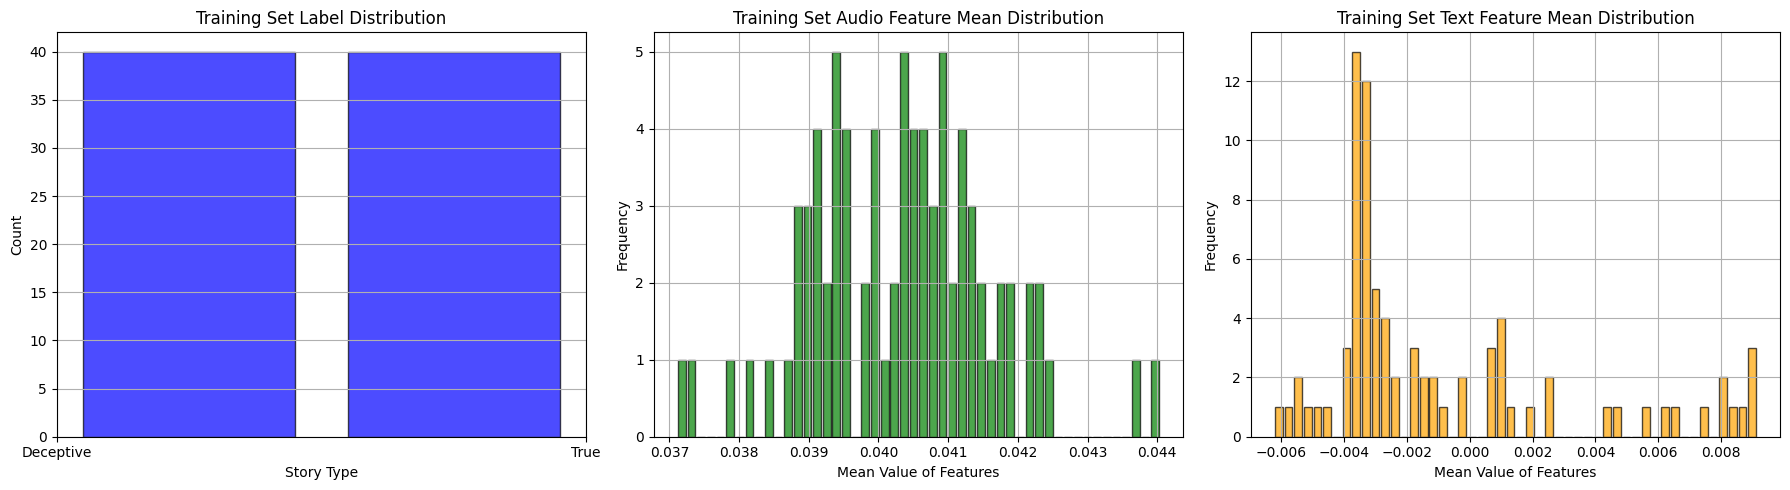

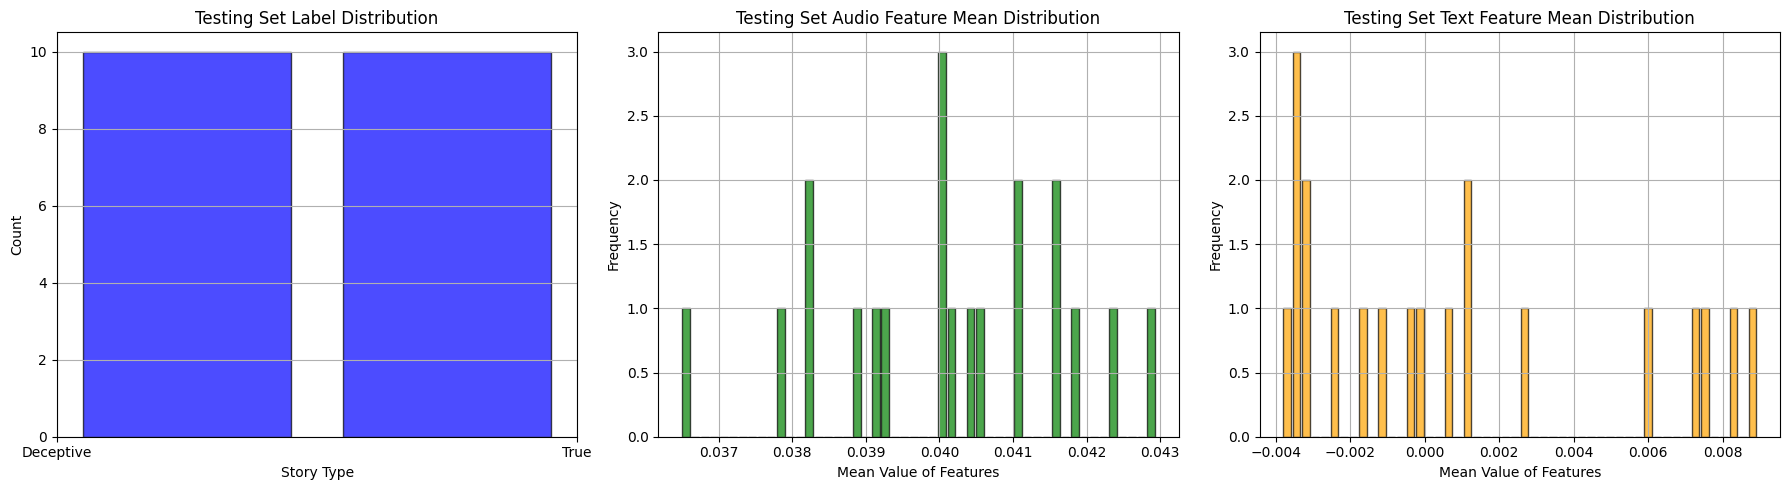

In [7]:
def visualize_distributions(labels, audio_features, text_features, dataset_type="Training"):
    """
    Visualize the distributions of labels, audio feature means, and text feature means.

    Parameters:
        labels (array): The labels of the dataset (binary classification: True or Deceptive).
        audio_features (array): The audio feature matrix.
        text_features (array): The text feature matrix.
        dataset_type (str): The type of dataset (e.g., "Training" or "Testing"), used for plot titles.
    """
    # Set up a 1-row, 3-column layout for visualizations
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Visualize the label distribution
    axes[0].hist(labels, bins=2, alpha=0.7, color='blue', edgecolor='black', rwidth=0.8)
    axes[0].set_xticks([0, 1])
    axes[0].set_xticklabels(['Deceptive', 'True'])  # Assign labels for binary classification
    axes[0].set_xlabel('Story Type')
    axes[0].set_ylabel('Count')
    axes[0].set_title(f"{dataset_type} Set Label Distribution")
    axes[0].grid(True)  # Add gridlines for better visualization

    # Visualize the mean values of audio features
    audio_feature_means = audio_features.mean(axis=1)  # Compute the mean for each sample
    axes[1].hist(audio_feature_means, bins=50, alpha=0.7, color='green', edgecolor='black', rwidth=0.8)
    axes[1].set_xlabel('Mean Value of Features')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title(f"{dataset_type} Set Audio Feature Mean Distribution")
    axes[1].grid(True)

    # Visualize the mean values of text features
    text_feature_means = text_features.mean(axis=1)  # Compute the mean for each sample
    axes[2].hist(text_feature_means, bins=50, alpha=0.7, color='orange', edgecolor='black', rwidth=0.8)
    axes[2].set_xlabel('Mean Value of Features')
    axes[2].set_ylabel('Frequency')
    axes[2].set_title(f"{dataset_type} Set Text Feature Mean Distribution")
    axes[2].grid(True)

    # Adjust the layout to prevent overlapping
    plt.tight_layout()
    plt.show()


# Visualize the training set
visualize_distributions(train_labels_array, train_audio_features_array, train_text_features_array, dataset_type="Training")

# Visualize the testing set
visualize_distributions(test_labels_array, test_audio_features_array, test_text_features_array, dataset_type="Testing")

## 5.6 Dataset Limitations

1. **Small Dataset Size**:
   - The dataset contains only 100 samples, which is relatively small for deep learning tasks and may lead to overfitting.
   - Data augmentation techniques (e.g., audio speed adjustment, noise addition) could be used to address this issue. However, for multimodal tasks, audio and text modalities might interfere with each other. Therefore, such techniques were not used in this project.

2. **Complexity of Multimodal Feature Fusion**:
   - The distribution differences between audio and text features may increase the complexity of fusion methods.

3. **Potential Labeling Errors**:
   - Although the error in `00094.wav` was corrected, other labeling errors may still exist, potentially impacting the model's performance.

# 6 Experiments and results

## 6.1 Model Definition

### 6.1.1 AudioTextClassifier

In [8]:
# Define a binary classification model for audio and text features
class AudioTextClassifier(nn.Module):
    def __init__(self, audio_feature_dim, text_feature_dim):
        """
        Initializes the model components for processing audio and text features,
        and combines them for binary classification.
        
        Args:
            audio_feature_dim (int): The dimensionality of the audio feature input.
            text_feature_dim (int): The dimensionality of the text feature input.
        """
        super(AudioTextClassifier, self).__init__()
        
        # Audio feature processing: Sequentially reduces dimensionality
        self.audio_fc1 = nn.Linear(audio_feature_dim, 4096)  # Reduces from initial dim to 4096
        self.audio_fc2 = nn.Linear(4096, 1024)               # Further reduces to 1024

        # Text feature processing: Reduces dimensionality to 512
        self.text_fc = nn.Linear(text_feature_dim, 512)
        
        # Fully connected layers for combined features
        self.fc1 = nn.Linear(1536, 2048)  # Combines processed audio (1024) and text (512) features
        self.fc2 = nn.Linear(2048, 256)   # Reduces combined features to 512
        self.fc3 = nn.Linear(256, 1)      # Final output for binary classification
        
        # Activation function and Dropout for regularization
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)    # Prevents overfitting by randomly dropping units

    def forward(self, audio_features, text_features):
        """
        Defines the forward pass of the model. Processes audio and text features separately,
        combines them, and passes through fully connected layers for binary classification.
        
        Args:
            audio_features (torch.Tensor): Input tensor for audio features.
            text_features (torch.Tensor): Input tensor for text features.
        
        Returns:
            torch.Tensor: Predicted probabilities for binary classification (range: [0, 1]).
        """
        # Process audio features through fully connected layers
        audio_x = self.audio_fc1(audio_features)
        audio_x = self.relu(audio_x)
        audio_x = self.dropout(audio_x)

        audio_x = self.audio_fc2(audio_x)
        
        # Process text features through a fully connected layer
        text_x = self.text_fc(text_features)
        
        # Concatenate audio and text features along the last dimension
        combined_features = torch.cat((audio_x, text_x), dim=1)
        
        # Process combined features through fully connected layers
        x = self.fc1(combined_features)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc3(x)
        
        # Apply Sigmoid activation to output probabilities for binary classification
        return torch.sigmoid(x).squeeze()  # Outputs probabilities in the range [0, 1]

### 6.1.2 SharedSpaceClassifier

In [9]:
# Define a binary classification model using a shared latent space for audio and text features
class SharedSpaceClassifier(nn.Module):
    def __init__(self, audio_feature_dim, text_feature_dim, shared_dim=512):
        """
        Initializes the model components for projecting audio and text features
        into a shared latent space and performing binary classification.
        
        Args:
            audio_feature_dim (int): Dimensionality of the audio feature input.
            text_feature_dim (int): Dimensionality of the text feature input.
            shared_dim (int): Dimensionality of the shared latent space.
        """
        super(SharedSpaceClassifier, self).__init__()
        
        # Audio sub-network: Sequentially projects audio features into the shared latent space
        self.audio_fc1 = nn.Linear(audio_feature_dim, 2048)  # Reduces from initial dim to 2048
        self.audio_fc2 = nn.Linear(2048, shared_dim)         # Projects into the shared latent space
        self.audio_bn = nn.BatchNorm1d(shared_dim)           # Applies Batch Normalization
        
        # Text sub-network: Projects text features directly into the shared latent space
        self.text_fc1 = nn.Linear(text_feature_dim, shared_dim)
        self.text_bn = nn.BatchNorm1d(shared_dim)            # Applies Batch Normalization
        
        # Classifier head: Processes shared latent features for binary classification
        self.classifier_fc1 = nn.Linear(shared_dim, 256)     # Reduces shared features to 256
        self.classifier_fc2 = nn.Linear(256, 1)              # Final output for binary classification
        
        # Activation function and Dropout for regularization
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)                       # Prevents overfitting

    def forward(self, audio_features, text_features):
        """
        Defines the forward pass of the model. Processes audio and text features,
        maps them to a shared latent space, and performs binary classification.
        
        Args:
            audio_features (torch.Tensor): Input tensor for audio features.
            text_features (torch.Tensor): Input tensor for text features.
        
        Returns:
            torch.Tensor: Predicted probabilities for binary classification (range: [0, 1]).
        """
        # Process audio features through the audio sub-network
        audio_x = self.audio_fc1(audio_features)
        audio_x = self.relu(audio_x)
        audio_x = self.dropout(audio_x)

        audio_x = self.audio_fc2(audio_x)
        audio_x = self.audio_bn(audio_x)
        
        # Process text features through the text sub-network
        text_x = self.text_fc1(text_features)
        text_x = self.text_bn(text_x)
        
        # Combine audio and text features in the shared latent space
        shared_x = self.relu(audio_x + text_x)  # Element-wise addition
        
        # Pass the shared features through the classifier head
        x = self.classifier_fc1(shared_x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.classifier_fc2(x)
        
        # Apply Sigmoid activation to output probabilities for binary classification
        return torch.sigmoid(x).squeeze()  # Outputs probabilities in the range [0, 1]


### 6.1.3 AttentionFusionClassifier

In [10]:
# Define a binary classification model using attention-based fusion of audio and text features
class AttentionFusionClassifier(nn.Module):
    def __init__(self, audio_feature_dim, text_feature_dim):
        """
        Initializes the model components for processing audio and text features, 
        applying attention-based fusion, and performing binary classification.

        Args:
            audio_feature_dim (int): Dimensionality of the audio feature input.
            text_feature_dim (int): Dimensionality of the text feature input.
        """
        super(AttentionFusionClassifier, self).__init__()
        
        # Audio sub-network: Sequentially reduces the dimensionality of audio features
        self.audio_fc1 = nn.Linear(audio_feature_dim, 4096)  # Reduces from initial dim to 4096
        self.audio_fc2 = nn.Linear(4096, 512)               # Further reduces to 512
        
        # Text sub-network: Reduces dimensionality of text features to 512
        self.text_fc = nn.Linear(text_feature_dim, 512)
        
        # Attention mechanism: Generates attention weights for audio and text features
        self.attention_fc = nn.Linear(1024, 2)  # Outputs two attention weights
        
        # Classifier head: Processes fused features for binary classification
        self.classifier_fc1 = nn.Linear(1024, 256)  # Reduces fused features to 512
        self.classifier_fc2 = nn.Linear(256, 1)     # Final output for binary classification
        
        # Activation function and Dropout for regularization
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)              # Prevents overfitting

    def forward(self, audio_features, text_features):
        """
        Defines the forward pass of the model. Processes audio and text features, applies 
        attention-based fusion, and performs binary classification.

        Args:
            audio_features (torch.Tensor): Input tensor for audio features.
            text_features (torch.Tensor): Input tensor for text features.
        
        Returns:
            torch.Tensor: Predicted probabilities for binary classification (range: [0, 1]).
        """
        # Process audio features through the audio sub-network
        audio_x = self.audio_fc1(audio_features)
        audio_x = self.relu(audio_x)
        audio_x = self.dropout(audio_x)

        audio_x = self.audio_fc2(audio_x)
        audio_x = self.relu(audio_x)
        
        # Process text features through the text sub-network
        text_x = self.text_fc(text_features)
        text_x = self.relu(text_x)
        
        # Concatenate audio and text features along the last dimension
        combined = torch.cat((audio_x, text_x), dim=1)
        
        # Compute attention weights
        attention_weights = self.attention_fc(combined)
        attention_weights = torch.softmax(attention_weights, dim=1)  # Normalizes weights
        
        # Apply attention weights to audio and text features
        weighted_audio = attention_weights[:, 0].unsqueeze(1) * audio_x
        weighted_text = attention_weights[:, 1].unsqueeze(1) * text_x
        
        # Concatenate weighted audio and text features
        fused_features = torch.cat((weighted_audio, weighted_text), dim=1)
        
        # Pass the fused features through the classifier head
        x = self.classifier_fc1(fused_features)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.classifier_fc2(x)
        
        # Apply Sigmoid activation to output probabilities for binary classification
        return torch.sigmoid(x).squeeze()  # Outputs probabilities in the range [0, 1]

### 6.1.4 StackingMetaModel

In [11]:
# Define a stacking meta-model for binary classification
class StackingMetaModel(nn.Module):
    def __init__(self):
        """
        Initializes the stacking meta-model, which takes the predictions of 
        multiple base models as input and outputs the final binary classification result.
        """
        super(StackingMetaModel, self).__init__()
        
        # First fully connected layer: Processes input predictions
        self.fc1 = nn.Linear(3, 16)  # Input dimension is 3 (predictions from 3 base models)
        
        # Second fully connected layer: Reduces to a single output for binary classification
        self.fc2 = nn.Linear(16, 1)
        
        # Activation functions
        self.relu = nn.ReLU()      # ReLU for non-linear transformations
        self.sigmoid = nn.Sigmoid()  # Sigmoid for output probabilities in range [0, 1]

    def forward(self, predictions):
        """
        Defines the forward pass of the meta-model.

        Args:
            predictions (torch.Tensor): Input tensor containing predictions 
                                        from base models (shape: [batch_size, 3]).
        
        Returns:
            torch.Tensor: Predicted probabilities for binary classification (range: [0, 1]).
        """
        x = self.fc1(predictions)  # Process input through the first layer
        x = self.relu(x)           # Apply ReLU activation
        x = self.fc2(x)            # Process through the second layer
        return self.sigmoid(x)     # Apply Sigmoid activation to output probabilities

## 6.2 Model Initialization and Training Setup

In [12]:
# Define three base models
model1 = AudioTextClassifier(16384, 768).to(device)  # Model 1: Processes audio and text features
model2 = SharedSpaceClassifier(16384, 768).to(device)  # Model 2: Uses shared latent space
model3 = AttentionFusionClassifier(16384, 768).to(device)  # Model 3: Attention-based fusion

# Define the stacking meta-model
meta_model = StackingMetaModel().to(device)  # Combines predictions from the base models

# Define the loss function
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification

# Define the optimizer for the meta-model
meta_optimizer = optim.Adam(meta_model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# Convert training data to PyTorch tensors
# Audio features, text features, and labels from the training dataset
train_audio_features_tensor = torch.tensor(train_audio_features_array, dtype=torch.float32)
train_text_features_tensor = torch.tensor(train_text_features_array, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels_array, dtype=torch.float32).view(-1, 1)  # Reshape to [batch_size, 1]

# Convert test data to PyTorch tensors
# Audio features, text features, and labels from the test dataset
test_audio_features_tensor = torch.tensor(test_audio_features_array, dtype=torch.float32)
test_text_features_tensor = torch.tensor(test_text_features_array, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels_array, dtype=torch.float32).view(-1, 1)  # Reshape to [batch_size, 1]

## 6.3 Model Training and Loss Visualization

### 6.3.1 Base Model Training

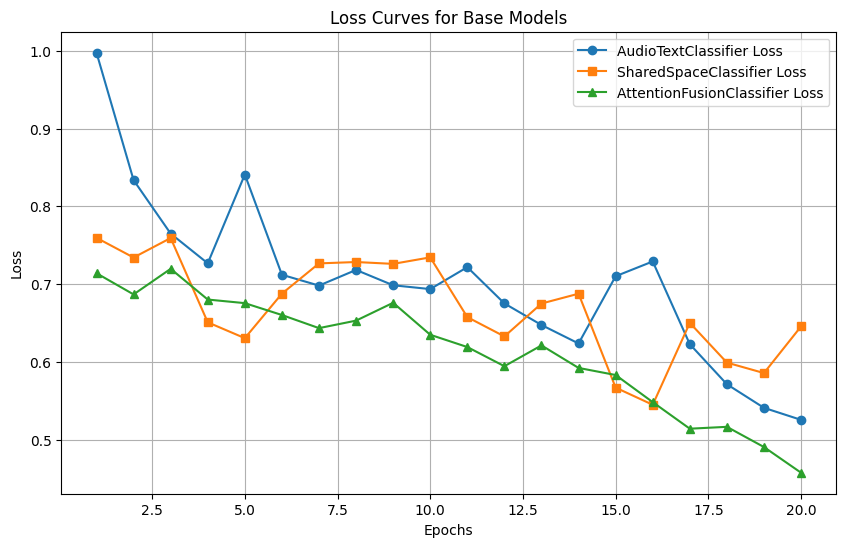

In [13]:
# Training parameters
num_epochs = 20  # Number of training epochs
batch_size = 4   # Batch size for DataLoader

# Initialize a list to store the average loss for each epoch
train_losses = []

# Create DataLoader for training and testing datasets
train_dataset = TensorDataset(train_audio_features_tensor, train_text_features_tensor, train_labels_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  # Shuffle training data

test_dataset = TensorDataset(test_audio_features_tensor, test_text_features_tensor, test_labels_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)  # No shuffle for testing

# Function to train a single model
def train_model(model, train_dataloader, optimizer, num_epochs, model_name):
    train_losses = []  # To store the loss for each epoch

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct = 0
        total = 0

        for audio_features, text_features, labels in train_dataloader:
            # Move data to the device
            audio_features = audio_features.to(device)
            text_features = text_features.to(device)
            labels = labels.to(device).view(-1)  # Ensure labels have shape [batch_size]

            # Forward pass
            optimizer.zero_grad()  # Clear previous gradients
            outputs = model(audio_features, text_features).squeeze()  # Output probabilities

            # Compute the loss
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Update metrics
            running_loss += loss.item()  # Accumulate batch loss
            predicted = (outputs > 0.5).float()  # Threshold at 0.5 for binary prediction
            total += labels.size(0)  # Total number of samples
            correct += (predicted == labels).sum().item()  # Count correct predictions

        # Calculate average loss for the epoch
        avg_loss = running_loss / len(train_dataloader)
        train_losses.append(avg_loss)

        # Calculate training accuracy
        # train_accuracy = 100 * correct / total
        # print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {train_accuracy:.2f}%")

    return train_losses

# Initialize and train each model
# Model 1: AudioTextClassifier
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)  # Optimizer for model1
train_losses_model1 = train_model(model1, train_dataloader, optimizer1, num_epochs, "AudioTextClassifier")

# Model 2: SharedSpaceClassifier
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)  # Optimizer for model2
train_losses_model2 = train_model(model2, train_dataloader, optimizer2, num_epochs, "SharedSpaceClassifier")

# Model 3: AttentionFusionClassifier
optimizer3 = optim.Adam(model3.parameters(), lr=0.001)  # Optimizer for model3
train_losses_model3 = train_model(model3, train_dataloader, optimizer3, num_epochs, "AttentionFusionClassifier")

# Plot loss curves for all three models
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses_model1, marker='o', label='AudioTextClassifier Loss')
plt.plot(range(1, num_epochs + 1), train_losses_model2, marker='s', label='SharedSpaceClassifier Loss')
plt.plot(range(1, num_epochs + 1), train_losses_model3, marker='^', label='AttentionFusionClassifier Loss')
plt.title('Loss Curves for Base Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

### 6.3.2 Meta-Model Training

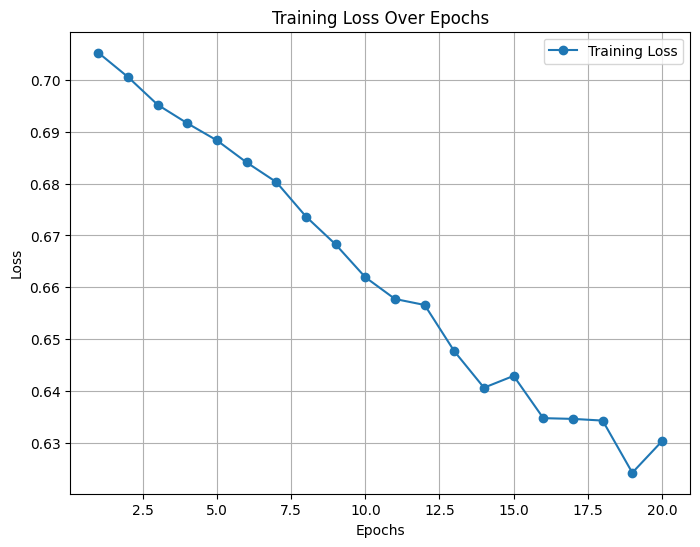

In [14]:
# Train the stacking meta-model

for epoch in range(num_epochs):
    meta_model.train()  # Set the meta-model to training mode
    running_loss = 0.0  # Accumulate total loss for the epoch
    correct = 0         # Count of correct predictions
    total = 0           # Total number of samples

    # Iterate through training data in batches
    for audio_features, text_features, labels in train_dataloader:
        # Move data to the device (CPU or GPU)
        audio_features = audio_features.to(device)
        text_features = text_features.to(device)
        labels = labels.to(device).view(-1)  # Reshape labels to ensure proper shape

        # Obtain predictions from pre-trained base models
        prob1 = model1(audio_features, text_features).detach()  # Detach to avoid gradient updates in base models
        prob2 = model2(audio_features, text_features).detach()
        prob3 = model3(audio_features, text_features).detach()

        # Stack the outputs of base models to form the input for the meta-model
        stacked_predictions = torch.stack([prob1, prob2, prob3], dim=1)

        # Forward pass through the meta-model
        meta_optimizer.zero_grad()  # Clear gradients from the previous step
        outputs = meta_model(stacked_predictions).squeeze()  # Output shape [batch_size]

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()  # Compute gradients
        meta_optimizer.step()  # Update meta-model parameters

        # Update training loss and accuracy
        running_loss += loss.item()  # Accumulate batch loss
        predicted = (outputs > 0.5).float()  # Apply a threshold of 0.5 to get binary predictions
        total += labels.size(0)  # Update total sample count
        correct += (predicted == labels).sum().item()  # Update correct predictions count

    # Calculate the average loss for the epoch
    avg_loss = running_loss / len(train_dataloader)
    train_losses.append(avg_loss)  # Store the average loss

    # Calculate and print training accuracy for the epoch
    # train_accuracy = 100 * correct / total
    # print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {train_accuracy:.2f}%")

# Plot the loss curve for training
plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')  # Plot training loss
plt.title('Training Loss Over Epochs')  # Set the title of the plot
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.grid(True)  # Add a grid to the plot for better readability
plt.legend()  # Add a legend to indicate the line represents training loss
plt.show()  # Display the plot

## 6.4 Model Evaluation

In [15]:
# Evaluate the stacking meta-model
meta_model.eval()  # Set the meta-model to evaluation mode
correct = 0        # Counter for correct predictions
total = 0          # Total number of samples
test_loss = 0.0    # Accumulator for total test loss
predictions = []   # List to store model predictions
labels_list = []   # List to store true labels

# Disable gradient computation for evaluation
with torch.no_grad():
    for audio_features, text_features, labels in test_dataloader:
        # Move data to the computation device (CPU or GPU)
        audio_features, text_features, labels = audio_features.to(device), text_features.to(device), labels.to(device)
        labels = labels.view(-1)  # Ensure labels have the correct shape [batch_size]

        # Get predictions from the base models
        prob1 = model1(audio_features, text_features)  # Predictions from base model 1
        prob2 = model2(audio_features, text_features)  # Predictions from base model 2
        prob3 = model3(audio_features, text_features)  # Predictions from base model 3

        # Stack the outputs from the base models
        stacked_predictions = torch.stack([prob1, prob2, prob3], dim=1)  # Shape: [batch_size, 3]

        # Get final predictions from the stacking meta-model
        outputs = meta_model(stacked_predictions).squeeze()  # Squeeze to remove extra dimensions

        # Compute the loss for the test batch
        loss = criterion(outputs, labels)  # Binary Cross-Entropy Loss
        test_loss += loss.item()  # Accumulate the loss

        # Threshold predictions to get binary classification results
        predicted = (outputs > 0.5).float()  # Predictions: 1 if output > 0.5, else 0
        correct += (predicted == labels).sum().item()  # Count correct predictions
        total += labels.size(0)  # Update total number of samples

        # Store predictions and true labels for evaluation metrics
        predictions.extend(predicted.cpu().numpy())  # Convert predictions to NumPy and add to the list
        labels_list.extend(labels.cpu().numpy())     # Convert labels to NumPy and add to the list

# Calculate accuracy
test_accuracy = 100 * correct / total  # Accuracy = (Correct Predictions / Total Samples) * 100
average_loss = test_loss / len(test_dataloader)  # Average loss across all test batches

# Print test accuracy and average loss
print(f"Test Accuracy: {test_accuracy:.2f}%")
print(f"Test Loss: {average_loss:.4f}")

# Print classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(labels_list, predictions))  # Generate and print detailed classification metrics

Test Accuracy: 60.00%
Test Loss: 0.6536
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.20      0.33        10
         1.0       0.56      1.00      0.71        10

    accuracy                           0.60        20
   macro avg       0.78      0.60      0.52        20
weighted avg       0.78      0.60      0.52        20



## 6.5 Analysis and Explanation of Results

#### **Base Model Training Loss Analysis**
The **first figure** shows the training loss curves for the three base models:
   - **AudioTextClassifier**: Exhibits fluctuating loss early on, indicating challenges in convergence. By the 20th epoch, the loss stabilizes, suggesting the model has learned from the data.
   - **SharedSpaceClassifier**: Achieves relatively stable training with a gradual decline in loss, showing consistent learning over epochs.
   - **AttentionFusionClassifier**: Demonstrates the fastest convergence among the three models, with the lowest final loss value, indicating effective fusion of features.

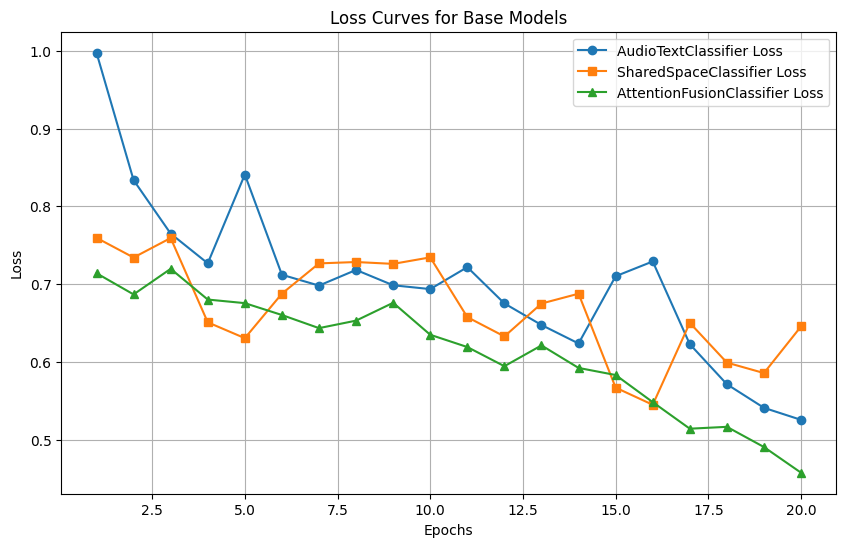

#### **Stacking Meta-Model Training Loss**
The **second figure** displays the training loss of the stacking meta-model:
   - A smooth and steady decline in loss is observed, suggesting that the meta-model successfully integrates predictions from the base models.
   - The final loss approaches **0.63**, indicating that the meta-model has effectively minimized classification errors on the training data.

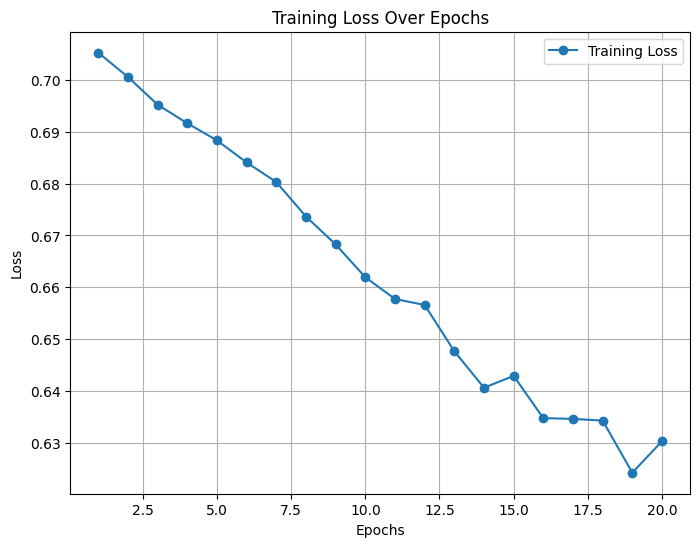

#### **Evaluation Metrics**
1. **Test Accuracy**: 
   - The meta-model achieved **60.00% accuracy** on the test dataset. This is moderate performance, indicating room for improvement, possibly due to limitations in the dataset size or model complexity.

2. **Test Loss**:
   - The test loss is **0.6536**, slightly higher than the training loss, which could be attributed to overfitting or differences between the training and test data distributions.

3. **Classification Report**:
   - **Class 0 (Deceptive Stories)**:
     - **Precision**: 1.00 (No false positives), but this is misleading because the recall is only **0.20**, indicating the model fails to identify most true negatives.
     - **F1-Score**: 0.33, showing poor balance between precision and recall.
   - **Class 1 (True Stories)**:
     - **Precision**: 0.56, with better recall at **1.00**, indicating the model predicts all true stories correctly but with some false positives.
     - **F1-Score**: 0.71, suggesting better performance on this class.
   - Overall, the model is biased toward **Class 1 (True Stories)**, leading to poor generalization for **Class 0 (Deceptive Stories)**.

- **Test Accuracy**: **60.00%**
- **Test Loss**: **0.6536**

#### **Classification Report**
| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0.0** (Deceptive Stories) | 1.00 | 0.20 | 0.33 | 10 |
| **1.0** (True Stories)      | 0.56 | 1.00 | 0.71 | 10 |

#### **Overall Metrics**
| Metric       | Macro Avg | Weighted Avg |
|--------------|-----------|--------------|
| **Precision**| 0.78      | 0.78         |
| **Recall**   | 0.60      | 0.60         |
| **F1-Score** | 0.52      | 0.52         |
| **Support**  | 20        | 20           |

#### **Conclusion**
1. The **imbalanced dataset** (equal distribution of classes, but limited size) might have caused the model to overfit to **Class 1 (True Stories)**.
2. The base models contributed diverse predictions, but their fusion in the meta-model may have amplified biases toward one class.
3. Further data augmentation or more sophisticated fusion mechanisms, such as weighted attention across base model outputs, could improve performance.

# 7. Conclusions

## 7.1 Summary of Results
1. **Performance**:
   - The stacking meta-model achieved **60.00% accuracy** on the test dataset. While the model successfully integrates predictions from the base models, its overall performance indicates room for improvement.
   - The meta-model showed a bias towards predicting **true stories (Class 1)**, as evidenced by high recall (1.00) but low precision (0.56) for this class, while performing poorly on **deceptive stories (Class 0)** with low recall (0.20).

2. **Base Model Insights**:
   - Among the three base models, the **AttentionFusionClassifier** showed the fastest convergence and lowest loss, highlighting the effectiveness of the attention mechanism for multimodal feature fusion.
   - The **SharedSpaceClassifier** demonstrated consistent learning, while the **AudioTextClassifier** had higher variability in its loss curve, suggesting challenges in balancing audio and text features.

3. **Meta-Model Limitations**:
   - The meta-model struggled to effectively generalize predictions for both classes, especially for **Class 0 (deceptive stories)**. This may be attributed to the limited dataset size and the imbalanced learning process.

## 7.2 Suggestions for Improvements
1. **Data Improvements**:
   - **Dataset Size**: Increasing the size of the dataset would provide the models with more diverse examples, improving generalization.
   - **Data Augmentation**: In multimodal tasks, textual noise can significantly affect semantic accuracy, making direct text augmentation challenging. Instead, audio augmentation techniques (e.g., adding noise or pitch shifting) can be applied, followed by transcription, which indirectly enhances the text data.

2. **Model Improvements**:
   - **Weighted Stacking**: Assign higher weights to base models that perform better on specific classes, enabling the meta-model to focus on their strengths.
   - **Advanced Fusion Mechanisms**: Experiment with more sophisticated meta-model architectures, such as attention-based or transformer-based approaches, to better integrate base model predictions(assuming sufficient dataset size).
   - **Class Imbalance Handling**: Incorporate class-weighted loss functions or oversample the minority class to improve recall for **Class 0 (deceptive stories)**.

3. **Hyperparameter Tuning**:
   - Explore optimal learning rates, dropout rates, and batch sizes for each model to maximize their performance.

4. **Evaluation Metrics**:
   - Incorporate additional evaluation metrics, such as the area under the ROC curve (AUC-ROC), to better understand model performance beyond accuracy and F1-score.

## 7.3 Conclusion
This project demonstrated the potential of multimodal stacking models for classifying audio and text data. While the current approach provides a solid foundation, addressing the identified limitations through better data preprocessing, advanced modeling, and balanced evaluation will be essential for achieving higher accuracy and robustness in future iterations.

# 8. References

### 1. Pre-trained Models:
   - **Wav2Vec2**:
     - `Wav2Vec2ForCTC` and `Wav2Vec2Processor`:
       - English model: `"wav2vec2-base-960h"` ([Hugging Face Repository](https://huggingface.co/facebook/wav2vec2-base-960h))
       - Chinese model: `"wav2vec2-large-xlsr-53-chinese-zh-cn"` ([Hugging Face Repository](https://huggingface.co/facebook/wav2vec2-large-xlsr-53-chinese-zh-cn))
       - General feature extraction model: `"wav2vec2-xls-r-300m"` ([Hugging Face Repository](https://huggingface.co/facebook/wav2vec2-xls-r-300m))
     - Feature Extractor: `"wav2vec2-xls-r-300m"` ([Hugging Face Repository](https://huggingface.co/facebook/wav2vec2-xls-r-300m))

   - **BERT**:
     - Multilingual BERT Tokenizer and Model:
       - `"bert-base-multilingual-cased"` ([Hugging Face Repository](https://huggingface.co/bert-base-multilingual-cased))

### 2. Custom Model Architectures:
   - `AudioTextClassifier`: Designed to process and integrate audio and text features for binary classification.
   - `SharedSpaceClassifier`: Implements a shared latent space approach for aligning audio and text features.
   - `AttentionFusionClassifier`: Utilizes attention-based fusion for dynamically weighting audio and text features.
   - `StackingMetaModel`: Combines predictions from base models for final classification using a stacking approach.

### 3. Libraries and Tools:
   - **PyTorch** ([PyTorch Documentation](https://pytorch.org/)): For building and training deep learning models.
   - **Transformers** ([Hugging Face Transformers](https://huggingface.co/transformers/)): For pre-trained language and audio models.
   - **Scikit-learn** ([Scikit-learn Documentation](https://scikit-learn.org/)): For evaluation metrics and additional utilities (e.g., `classification_report`).

### 4. Papers and Books:
   - Research papers and documentation for:
     - **Wav2Vec2**: [“wav2vec 2.0: A Framework for Self-Supervised Learning of Speech Representations”](https://arxiv.org/abs/2006.11477)
     - **BERT**: [“BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding”](https://arxiv.org/abs/1810.04805)